# CS 471 Machine Learning  
## Fall 2024  
### Term / Semester Project  

# NDVI-Based Crop Classification for Rice and Cotton Using Machine Learning  

---

## Instructor Name  
**Dr. Moazzam Fraz**

## Group Members  

1. **Muhammad Sarmad Saleem** - CMS ID: 411411  
2. **Tayyab Raza** - CMS ID: 404821 

## Problem Description: Agriculture Crop Type Classification (Rice and Cotton)  

Effective crop classification is essential for improving agricultural management, optimizing resource allocation, and enabling better policy formulation. This project focuses on classifying two specific crop types—rice and cotton—based on their spectral characteristics, particularly using Normalized Difference Vegetation Index (NDVI) values over a growing season. NDVI is a widely used vegetation index that measures vegetation health by comparing Near-Infrared (NIR) and Red light reflectan
\]  

NDVI plays a critical role in crop classification as it differentiates crop types based on growth patterns, tracks the unique spectral signatures of crops like rice and cotton, and aids in precise resource allocation and yield prediction. For instance, NDVI values plotted against months from May to November reveal that rice's NDVI peaks later in September, while cotton's NDVI peaks earlier around July-August. These distinct growth cycles highlight how NDVI effectively tracks crop health over time.  

---

## Dataset Description for Rice and Cotton Classification  

The dataset contains NDVI values collected for rice and cotton crops over a specific growing season across three consecutive years: 2021, 2022, and 2023. NDVI is derived from satellite imagery and is widely used to monitor crop health and growth patterns.  

### NDVI Time Series  
The dataset comprises 12 NDVI measurements per crop type, representing two NDVI values per month over a six-month growing period. Each NDVI time series reflects the unique growth patterns of either rice or cotton, showcasing their distinct spectral signatures throughout the season. The dataset is labeled, indicating whether a particular NDVI series corresponds to rice or cotton.  

### Data Across Three Years  
The dataset spans three years and contains the following distribution of samples for rice and cotton:  

- **2021**: 420 rice samples and 920 cotton samples  
- **2022**: 4688 rice samples and 2884 cotton samples  
- **2023**: 12412 rice samples and 11778 cotton samples  

### Explanation of Data Imbalance  
As observed from the data distribution, the dataset is highly imbalanced, with significantly fewer samples of rice compared to cotton across all three years. This imbalance poses a challenge for classification and requires careful handling to ensure accurate predictions for both crop types.


# Libraries Import

In [3]:
import pandas as pd
import os
import numpy as np
import os
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
import warnings
warnings.filterwarnings("ignore")



# Data Loading 

## General Function 
To load data from all CSV files and adding them in single dataframe

In [4]:


# Create a function to load and process the data for a given year
def load_and_process_data(year, data_dir):
    # Initialize an empty dataframe to store the data for the specific year
    data = pd.DataFrame()

    # Get the list of files for the specified year
    year_folder = str(year)

    files = os.listdir(os.path.join(data_dir, year_folder))
    
    # Load data from each file in the folder
    for filename in files:
        if filename.endswith(".csv"):
            # Read the CSV file
            df = pd.read_csv(os.path.join(data_dir, year_folder, filename))
            
            # Add 'Year' and 'CropType' to the dataframe
            base_name = filename.split('.')[0]
            croptype = base_name.rsplit('202', 1)[0]  # Assuming the 'CropType' is before '202'
            df['Year'] = year
            df['CropType'] = croptype
            
            # Append to the main dataframe
            data = pd.concat([data, df], ignore_index=True)
    

    return data



In [5]:
# Process data for 2021, 2022, and 2023

# Define the directory where the data files are stored
data_dir = "/kaggle/input/crop-dataset"

data_2021 = load_and_process_data(2021, data_dir)

data_2022 = load_and_process_data(2022, data_dir)

data_2023 = load_and_process_data(2023, data_dir)


print("Data processing complete")

Data processing complete


## Printing each year dataset

















In [6]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,rice
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,rice
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,rice
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,rice
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,rice


In [7]:
data_2022.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.442943,0.325107,0.448911,0.698456,1.000000,0.071374,0.714939,0.588107,0.571895,0.787698,0.816302,0.613884,2022,rice
1,0.128122,0.352554,0.533025,0.647528,1.000000,0.052378,0.534581,0.511706,0.562397,0.275249,0.553359,0.565554,2022,rice
2,0.400911,0.406091,0.443299,0.535024,0.978224,0.073414,0.387755,0.484515,0.605432,0.570827,0.636029,0.553675,2022,rice
3,0.390117,0.728009,0.760038,0.786063,1.000000,0.059971,0.555362,0.699239,0.893971,0.942492,0.869822,0.759206,2022,rice
4,0.117680,0.111500,0.102671,0.126739,0.144219,0.077910,0.204507,0.600983,0.762850,0.838978,0.824411,0.738954,2022,rice


In [8]:
data_2023.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.112304,0.168831,0.357419,0.652470,0.511220,0.071754,0.746601,0.714075,0.747262,0.729675,0.634746,0.199640,2023,cotton
1,0.111033,0.149460,0.360941,0.404814,0.385993,0.089474,0.647436,0.637131,0.677606,0.663667,0.581217,0.438363,2023,cotton
2,0.102703,0.226310,0.554877,0.790602,0.812145,0.090364,0.866772,0.787777,0.838983,0.784251,0.711433,0.869757,2023,cotton
3,0.090742,0.079962,0.355833,0.864751,0.837066,0.149301,0.890619,0.795135,0.834237,0.774393,0.683996,0.840936,2023,cotton
4,0.100312,0.077954,0.328019,0.697031,0.722988,0.242764,0.869281,0.811822,0.836173,0.802686,0.700463,0.848245,2023,cotton


# Data Preprocessing 

## Encoding Values

Since we have cotton and rice as two classes so we will appply one hot encoding here

In [9]:

def encode_values(data):
    data = pd.get_dummies(data,columns=['CropType'], drop_first=True)
    data["CropType_rice"]=data["CropType_rice"].astype(int)
    return data
    

In [10]:
data_2021=encode_values(data_2021)
data_2022=encode_values(data_2022)
data_2023=encode_values(data_2023)

In [11]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


## Checking Class Balance

In [12]:
class_balance = data_2021["CropType_rice"].value_counts()

class_balance

CropType_rice
0    2883
1     419
Name: count, dtype: int64

In [13]:
class_balance = data_2022["CropType_rice"].value_counts()

class_balance

CropType_rice
0    12411
1     4687
Name: count, dtype: int64

In [14]:
class_balance = data_2023["CropType_rice"].value_counts()

class_balance

CropType_rice
0    11777
1      919
Name: count, dtype: int64


###  Explanation
Since the class is very much unbalanced which can leads to training descrease accuracy so mitigate it.We should try every combination with that

## Handling Class Imbalance

### Taking Imbalanced Dataset

In [153]:
data_train_imbalanced= pd.concat([data_2021, data_2022, data_2023], ignore_index=True)

In [154]:
data_train_imbalanced.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


### Undersampling

In [155]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming data_train_imbalanced is your initial imbalanced dataset
X = data_train_imbalanced.drop(columns=["CropType_rice"])  # Features
y = data_train_imbalanced["CropType_rice"]  # Target variable

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Create a new DataFrame with undersampled data
data_train_undersampled = pd.DataFrame(X_undersampled, columns=X.columns)

# Add the target column back
data_train_undersampled["CropType_rice"] = y_undersampled

# Reset the index to start from 0 again
data_train_undersampled = data_train_undersampled.reset_index(drop=True)


In [156]:
data_train_undersampled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.117337,0.273992,0.268149,0.548470,1.000000,0.832440,0.898840,0.828042,0.828024,0.757594,0.684573,0.637016,2022,0
1,0.093453,0.098563,0.313694,0.640468,0.633192,0.666739,0.780282,0.761760,0.734252,0.748734,0.701416,0.196822,2023,0
2,0.091950,0.098503,0.236658,0.385646,0.759036,0.080949,0.659914,0.682338,0.716682,0.629586,0.515419,0.482459,2022,0
3,0.110544,0.072611,0.183673,0.501558,0.453919,0.523679,0.326877,0.771172,0.790939,0.706749,0.641488,0.534965,2022,0
4,0.148540,0.199646,0.310780,0.242058,0.455475,0.566485,0.579760,0.516943,0.655678,0.465879,0.294791,0.210379,2023,0


In [157]:
data_train_undersampled.shape

(12050, 14)

In [158]:
class_balance = data_train_undersampled["CropType_rice"].value_counts()

class_balance

CropType_rice
0    6025
1    6025
Name: count, dtype: int64

### Oversampling

In [88]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
data_train_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
data_train_oversampled["CropType_rice"] = y_oversampled

In [89]:
data_train_oversampled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


In [90]:
data_train_oversampled.shape

(54142, 14)

In [91]:
class_balance = data_train_oversampled["CropType_rice"].value_counts()

class_balance

CropType_rice
1    27071
0    27071
Name: count, dtype: int64

### SMOTE

In [15]:
from imblearn.over_sampling import SMOTENC

def apply_smote_nc(data, target_column, categorical_columns, random_state=42):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Identify categorical column indices
    categorical_features = [X.columns.get_loc(col) for col in categorical_columns]
    
    # Apply SMOTENC
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=random_state)
    X_smote, y_smote = smote_nc.fit_resample(X, y)
    
    smote_data = pd.DataFrame(X_smote, columns=X.columns)
    smote_data[target_column] = y_smote
    
    return smote_data


In [163]:

smote_data_2021 = apply_smote_nc(data_2021, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2022 = apply_smote_nc(data_2022, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2023 = apply_smote_nc(data_2023, target_column="CropType_rice", categorical_columns=["Year"])


In [164]:
class_balance = smote_data_2021["CropType_rice"].value_counts()

class_balance

CropType_rice
1    2883
0    2883
Name: count, dtype: int64

In [165]:
class_balance = smote_data_2022["CropType_rice"].value_counts()

class_balance

CropType_rice
1    12411
0    12411
Name: count, dtype: int64

In [166]:
class_balance = smote_data_2023["CropType_rice"].value_counts()

class_balance

CropType_rice
0    11777
1    11777
Name: count, dtype: int64

In [167]:
data_train_smote = pd.concat([smote_data_2021, smote_data_2022, smote_data_2023], ignore_index=True)

In [168]:
data_train_smote.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


In [169]:
data_train_smote.shape

(54142, 14)

In [170]:
class_balance = data_train_smote["CropType_rice"].value_counts()

class_balance

CropType_rice
1    27071
0    27071
Name: count, dtype: int64

### Handling Data for Testing

Because we dont use augmented data in testing

In [171]:
data_test = pd.concat([data_2021, data_2022, data_2023], ignore_index=True)

In [172]:
data_test.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


## Outliers Removal

In [16]:
import pandas as pd
import numpy as np



def remove_outliers_zscore(df, threshold=3):
    """
    Remove outliers from a DataFrame using the Z-Score method.
    Rows with Z-Score > threshold (default=3) are considered outliers.
    """
    # Calculate Z-Score for each column
    z_scores = (df - df.mean()) / df.std()
    
    # Keep rows where all Z-Scores are within the threshold
    cleaned_df = df[(np.abs(z_scores) <= threshold).all(axis=1)]
    return cleaned_df



In [174]:
# Remove outliers from each copy of dataset we made


# For imbalanced data
print(f"Before removing outliers (Imbalanced): {data_train_imbalanced.shape}")
imbalanced_cleaned = remove_outliers_zscore(data_train_imbalanced, threshold=3)
print(f"After removing outliers (Imbalanced): {imbalanced_cleaned.shape}")

# For data_train_smote
print(f"Before removing outliers (SMOTE): {data_train_smote.shape}")
smote_cleaned = remove_outliers_zscore(data_train_smote, threshold=3)
print(f"After removing outliers (SMOTE): {smote_cleaned.shape}")

# For data_train_undersampled
print(f"Before removing outliers (Undersampled): {data_train_undersampled.shape}")
undersampled_cleaned = remove_outliers_zscore(data_train_undersampled, threshold=3)
print(f"After removing outliers (Undersampled): {undersampled_cleaned.shape}")

# For data_train_oversampled
print(f"Before removing outliers (Oversampled): {data_train_oversampled.shape}")
oversampled_cleaned = remove_outliers_zscore(data_train_oversampled, threshold=3)
print(f"After removing outliers (Oversampled): {oversampled_cleaned.shape}")

# Assign back to original variables after cleaning
data_train_imbalanced = imbalanced_cleaned
data_train_smote = smote_cleaned
data_train_undersampled = undersampled_cleaned
data_train_oversampled = oversampled_cleaned



Before removing outliers (Imbalanced): (33096, 14)
After removing outliers (Imbalanced): (30555, 14)
Before removing outliers (SMOTE): (54142, 14)
After removing outliers (SMOTE): (51409, 14)
Before removing outliers (Undersampled): (12050, 14)
After removing outliers (Undersampled): (11228, 14)
Before removing outliers (Oversampled): (50366, 14)
After removing outliers (Oversampled): (46786, 14)


## Scaling Dataset

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

def apply_scaling(df, exclude_columns=["CropType_rice", "Year"], scaler_type="standard"):
    """
    Function to apply different scaling techniques on numerical columns in the dataframe.
    
    Args:
    - df: DataFrame with features to be scaled.
    - exclude_columns: List of columns to exclude from scaling (e.g., target column or categorical columns).
    - scaler_type: Type of scaling to apply ("standard", "minmax", "robust", "quantile").
    
    Returns:
    - Scaled DataFrame with the same columns, excluding the ones from exclude_columns.
    """
    # Identify columns to scale (exclude target and categorical columns)
    columns_to_scale = [col for col in df.columns if col not in exclude_columns]
    
    # Initialize the appropriate scaler
    if scaler_type == "standard":
        scaler = StandardScaler()
    elif scaler_type == "minmax":
        scaler = MinMaxScaler()
    elif scaler_type == "robust":
        scaler = RobustScaler()
    elif scaler_type == "quantile":
        scaler = QuantileTransformer()
    else:
        raise ValueError("Invalid scaler type. Choose from ['standard', 'minmax', 'robust', 'quantile'].")
    
    # Apply the scaler
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_scaled["Year"] = df["Year"]  # Retain Year column
    df_scaled["CropType_rice"] = df["CropType_rice"]  # Retain target column
    
    return df_scaled


In [176]:
datasets = [data_train_imbalanced, data_train_smote, data_train_undersampled, data_train_oversampled]
scaled_datasets=[]
for dataset in datasets:
    scaled_datasets.append(apply_scaling(dataset, scaler_type="standard"))

data_train_imbalanced_scaled, data_train_smote_scaled, data_train_undersampled_scaled, data_train_oversampled_scaled = scaled_datasets



In [177]:
data_test_scaled=apply_scaling(data_test,scaler_type="standard")

In [178]:
data_train_imbalanced_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
1,-0.323519,-0.098252,-0.282215,1.265589,-0.281011,-0.913063,0.203169,-0.084246,-3.217990,-2.665907,-1.234082,-1.673290,2021,1
2,0.431665,-0.103288,-0.216142,0.649477,-0.682797,-0.906649,0.067984,0.106289,-0.552021,-2.692822,-1.177361,-1.726813,2021,1
3,0.904315,-0.136374,-0.426130,1.381128,-0.198466,-0.858786,0.220209,-0.135855,-2.892138,-2.592393,-1.936447,-1.596309,2021,1
4,-0.389312,-0.188499,1.065189,1.188115,-0.469393,-0.890244,0.154476,-0.037651,-0.630283,-2.640042,-2.093734,-1.644109,2021,1
5,-0.026731,-0.146166,0.847291,1.222465,-0.370818,-0.878658,0.207106,0.021562,-0.757711,-2.628962,-1.524088,-1.607002,2021,1


In [179]:
data_train_smote_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,-0.595046,-0.665135,-0.441346,0.027857,-0.608422,-0.061703,-0.023856,-1.533778,-2.752189,0.472899,0.888844,0.674736,2021,1
1,-0.403889,-0.384437,-0.526695,0.673684,-0.311254,-0.926497,0.378594,0.208209,-2.604412,-2.371283,-1.272619,-1.773726,2021,1
2,0.193943,-0.387211,-0.487027,0.213484,-0.664225,-0.920076,0.249453,0.373751,-0.393736,-2.394182,-1.224637,-1.823334,2021,1
3,0.568110,-0.405442,-0.613097,0.759984,-0.238737,-0.872162,0.394872,0.163370,-2.334208,-2.308740,-1.866759,-1.702375,2021,1
4,-0.455974,-0.434165,0.282248,0.615815,-0.476748,-0.903653,0.332079,0.248692,-0.458633,-2.349278,-1.999810,-1.746679,2021,1


# Applying Machine Learning Models 

## General function of cross validation

In [180]:
from sklearn.metrics import (
    accuracy_score, classification_report, precision_score, 
    recall_score, f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

def model_report(data_train, data_test, model):
    """
    Perform cross-validation with the specified model using training and testing data.
    
    Parameters:
        data_train (pd.DataFrame): Training dataset.
        data_test (pd.DataFrame): Testing dataset.
        model: A scikit-learn model to be trained and evaluated.

    Returns:
        None. Prints accuracy, classification reports, confusion matrices, and overall metrics.
    """
    # Lists to store results for overall metrics
    all_y_true = []  # True labels across all folds
    all_y_pred = []  # Predicted labels across all folds

    # Loop through the train-test splits (Year 1 & 2 vs Year 3, etc.)
    for train_years, test_year in [([2021, 2022], 2023), ([2021, 2023], 2022), ([2022, 2023], 2021)]:
        # Train and test data for the current split
        train_data = data_train[data_train['Year'].isin(train_years)]
        test_data = data_test[data_test['Year'] == test_year]
        
        # Prepare features and labels
        X_train = train_data.drop(['CropType_rice', 'Year'], axis=1)
        y_train = train_data['CropType_rice']
        X_test = test_data.drop(['CropType_rice', 'Year'], axis=1)
        y_test = test_data['CropType_rice']

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nAccuracy (Train: Years {train_years}, Test: Year {test_year}): {accuracy:.4f}")
        print(f"Classification Report (Train: Years {train_years}, Test: Year {test_year}):\n")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f"Confusion Matrix (Train: Years {train_years}, Test: Year {test_year})")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        # Append results to lists for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    # Calculate overall metrics
    overall_accuracy = accuracy_score(all_y_true, all_y_pred)
    overall_precision = precision_score(all_y_true, all_y_pred, average='weighted')
    overall_recall = recall_score(all_y_true, all_y_pred, average='weighted')
    overall_f1 = f1_score(all_y_true, all_y_pred, average='weighted')

    print("\nOverall Metrics:")
    print(f"Overall Accuracy: {overall_accuracy:.4f}")
    print(f"Overall Precision: {overall_precision:.4f}")
    print(f"Overall Recall: {overall_recall:.4f}")
    print(f"Overall F1-Score: {overall_f1:.4f}")


## Ensamble Method(XGBOOST)


In [75]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=10)




Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.7431
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     11777
           1       0.20      0.86      0.33       919

    accuracy                           0.74     12696
   macro avg       0.59      0.80      0.58     12696
weighted avg       0.93      0.74      0.80     12696



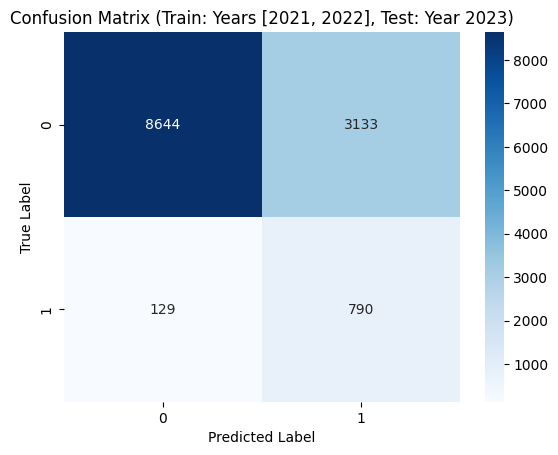


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8599
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12411
           1       0.83      0.61      0.70      4687

    accuracy                           0.86     17098
   macro avg       0.85      0.78      0.81     17098
weighted avg       0.86      0.86      0.85     17098



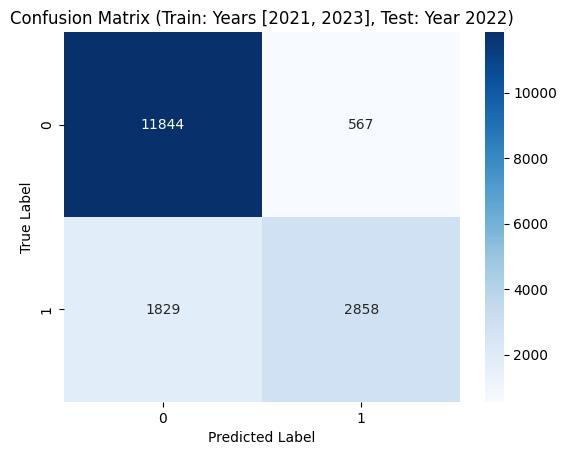


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.7162
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2883
           1       0.27      0.71      0.39       419

    accuracy                           0.72      3302
   macro avg       0.61      0.71      0.60      3302
weighted avg       0.86      0.72      0.76      3302



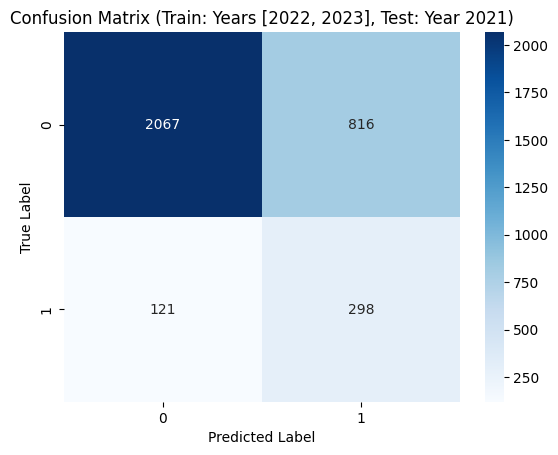


Overall Metrics:
Overall Accuracy: 0.8007
Overall Precision: 0.8338
Overall Recall: 0.8007
Overall F1-Score: 0.8128


In [76]:

model_report(data_train_smote_scaled,data_test_scaled, xgb_model)

### Bagging

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base learner (Decision Tree Classifier)
base_model = DecisionTreeClassifier(max_depth=5)
bagging_model = BaggingClassifier(estimator=base_model,
                                 n_estimators=50,  
                                 random_state=42)


Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.8036
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     11777
           1       0.26      0.92      0.40       919

    accuracy                           0.80     12696
   macro avg       0.63      0.86      0.64     12696
weighted avg       0.94      0.80      0.85     12696



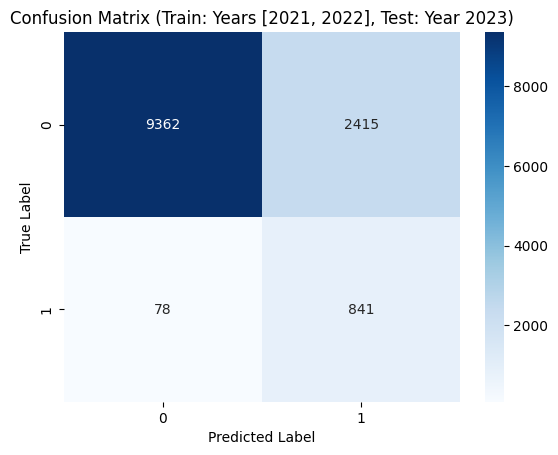


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8675
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12411
           1       0.76      0.76      0.76      4687

    accuracy                           0.87     17098
   macro avg       0.83      0.83      0.83     17098
weighted avg       0.87      0.87      0.87     17098



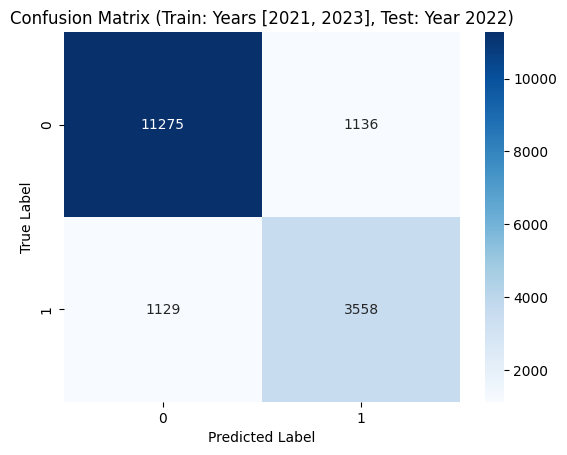


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.6260
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      2883
           1       0.20      0.68      0.31       419

    accuracy                           0.63      3302
   macro avg       0.57      0.65      0.53      3302
weighted avg       0.84      0.63      0.69      3302



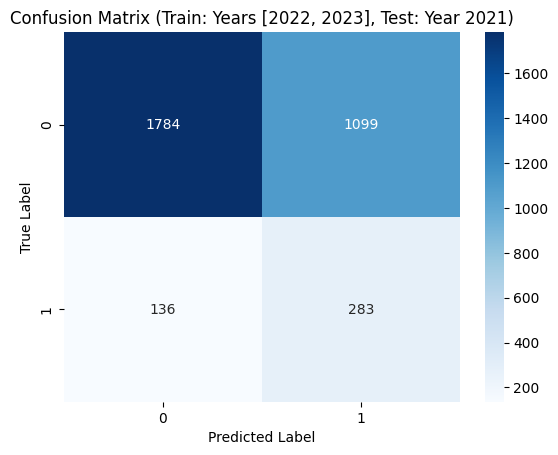


Overall Metrics:
Overall Accuracy: 0.8189
Overall Precision: 0.8631
Overall Recall: 0.8189
Overall F1-Score: 0.8325


In [78]:
model_report(data_train_smote_scaled,data_test_scaled, bagging_model)

## Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.7564
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     11777
           1       0.21      0.89      0.35       919

    accuracy                           0.76     12696
   macro avg       0.60      0.82      0.60     12696
weighted avg       0.93      0.76      0.81     12696



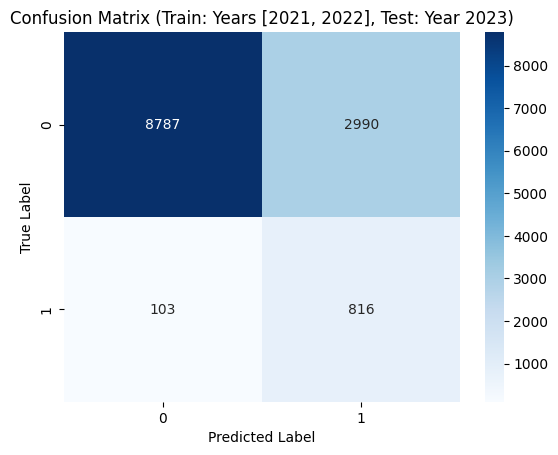


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8724
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     12411
           1       0.87      0.63      0.73      4687

    accuracy                           0.87     17098
   macro avg       0.87      0.80      0.82     17098
weighted avg       0.87      0.87      0.87     17098



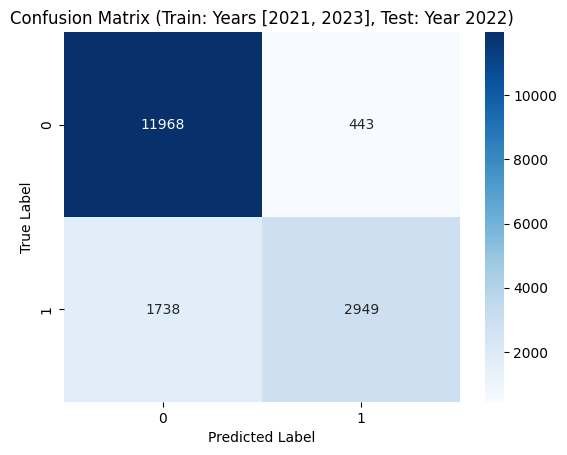


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.6702
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      2883
           1       0.23      0.70      0.35       419

    accuracy                           0.67      3302
   macro avg       0.59      0.68      0.56      3302
weighted avg       0.85      0.67      0.72      3302



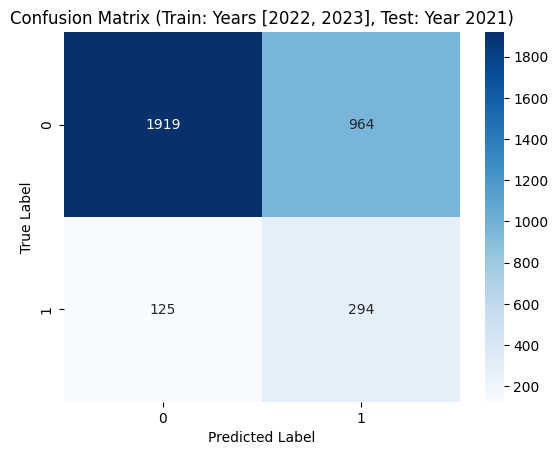


Overall Metrics:
Overall Accuracy: 0.8077
Overall Precision: 0.8401
Overall Recall: 0.8077
Overall F1-Score: 0.8194


In [143]:
model_report(data_train_smote_scaled,data_test_scaled,rf_model)

# SVM

In [144]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.6821
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     11777
           1       0.17      0.88      0.29       919

    accuracy                           0.68     12696
   macro avg       0.58      0.77      0.54     12696
weighted avg       0.93      0.68      0.76     12696



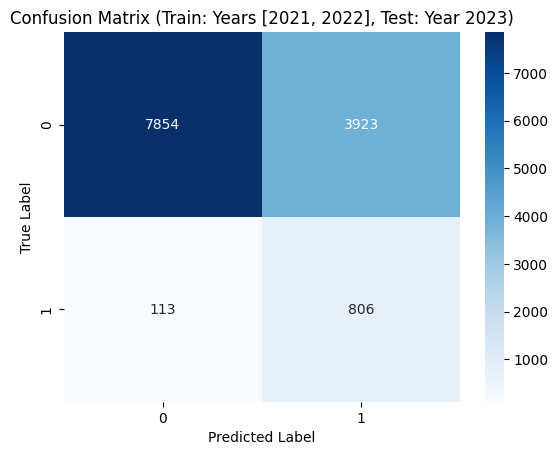


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8690
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12411
           1       0.76      0.76      0.76      4687

    accuracy                           0.87     17098
   macro avg       0.84      0.84      0.84     17098
weighted avg       0.87      0.87      0.87     17098



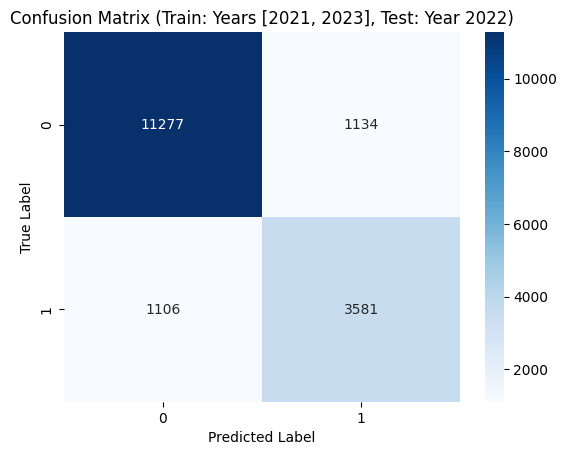


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.6717
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      2883
           1       0.25      0.77      0.37       419

    accuracy                           0.67      3302
   macro avg       0.60      0.71      0.58      3302
weighted avg       0.86      0.67      0.73      3302



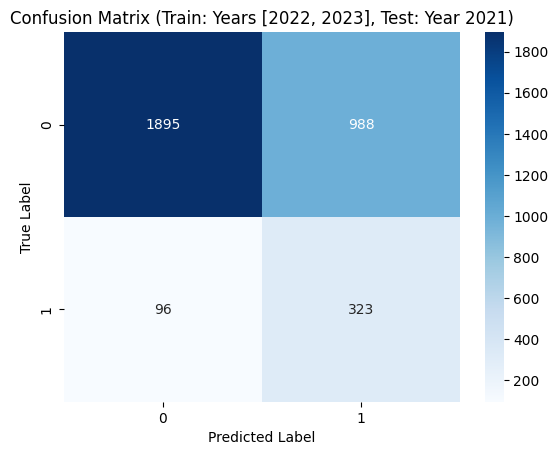


Overall Metrics:
Overall Accuracy: 0.7776
Overall Precision: 0.8495
Overall Recall: 0.7776
Overall F1-Score: 0.7983


In [145]:
model_report(data_train_smote_scaled,data_test_scaled,svm_model)

# Unsupervised Learning


## Definition

Unsupervised learning is a machine learning paradigm where models are trained on unlabeled data. The goal is to identify patterns, structures, or relationships within the data without explicit supervision. Unlike supervised learning, unsupervised learning algorithms do not rely on labeled inputs for training. Common techniques include:

- **Clustering**: Grouping data into clusters based on similarities (e.g., K-Means, DBSCAN).  
- **Dimensionality Reduction**: Reducing the number of features while preserving essential information (e.g., PCA, t-SNE).  
- **Anomaly Detection**: Identifying rare events or outliers within datasets.

Unsupervised learning is widely used in tasks such as customer segmentation, data compression, and feature extraction.


## Data Loading For Unsupervised Learning

### Data Loading

Data is already loaded above in 2021,2022 and 2023 and alreadt  dataframes combine it for unsupervised Learning Techniques

In [18]:
# Process data for 2021, 2022, and 2023

# Define the directory where the data files are stored
data_dir = "/kaggle/input/crop-dataset"

data_2021 = load_and_process_data(2021, data_dir)

data_2022 = load_and_process_data(2022, data_dir)

data_2023 = load_and_process_data(2023, data_dir)


print("Data processing complete")

Data processing complete


## Data Preprocessing

### One hot encoding


As cotton and rice are two classes here then we can use encoding here to convert them 

As both classes dont have orderly order so we use One hot encoding

In [19]:
data_2021=encode_values(data_2021)
data_2022=encode_values(data_2022)
data_2023=encode_values(data_2023)

### Checking Class Balance

In [20]:

smote_data_2021 = apply_smote_nc(data_2021, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2022 = apply_smote_nc(data_2022, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2023 = apply_smote_nc(data_2023, target_column="CropType_rice", categorical_columns=["Year"])


### Combining the Dataset

In [21]:
data_ul = pd.concat([smote_data_2021, smote_data_2022, smote_data_2023], ignore_index=True)

In [22]:
data_ul.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


In [23]:
data_ul.tail()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
54137,0.148048,0.140034,0.167053,0.201104,0.094954,0.194999,0.626557,0.756160,0.872197,0.901456,0.876802,0.805845,2023,1
54138,0.090355,0.451094,0.638081,0.714161,0.897380,0.240407,0.552073,0.276943,0.371091,0.366175,0.119623,0.139436,2023,1
54139,0.123033,0.190620,0.420964,0.746291,0.910541,0.797875,0.811451,0.540659,0.229201,0.659062,0.843742,0.809006,2023,1
54140,0.147606,0.494642,0.838361,0.875251,0.870311,0.678812,0.287897,0.455219,0.849908,0.865816,0.820242,0.749193,2023,1
54141,0.128070,0.163028,0.625797,0.909506,0.997410,0.860507,0.872026,0.609860,0.200045,0.662719,0.872411,0.745587,2023,1


In [24]:
data_ul.shape

(54142, 14)

## Scaling Features

### Standard Scaling



**Standard Scaling** (Z-score normalization) standardizes data by centering it around the mean and scaling it to unit variance. It ensures features have a mean of `0` and a standard deviation of `1`o

x


In [25]:
# We will use already defined function for scaling
data_ul_scaled=apply_scaling(data_ul,scaler_type="standard")

In [26]:
data_ul_scaled.drop("Year", axis=1, inplace=True)


In [27]:
data_ul_scaled.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,CropType_rice
0,-0.549765,-0.677640,-0.469785,0.025107,-0.587253,-0.046721,0.004789,-1.518680,-2.736508,0.453049,0.867792,0.664848,1
1,-0.424839,-0.438094,-0.552485,0.664602,-0.292135,-0.917338,0.402738,0.210834,-2.590206,-2.356826,-1.271411,-1.757678,1
2,-0.034142,-0.440462,-0.514048,0.208914,-0.642671,-0.910874,0.275042,0.375191,-0.401609,-2.379449,-1.223924,-1.806761,1
3,0.210385,-0.456020,-0.636205,0.750056,-0.220119,-0.862638,0.418835,0.166316,-2.322701,-2.295037,-1.859433,-1.687084,1
4,-0.458878,-0.480532,0.231349,0.607301,-0.456488,-0.894341,0.356743,0.251027,-0.465857,-2.335087,-1.991113,-1.730918,1


In [203]:
data_ul_scaled.to_csv("/kaggle/working/file.csv")

In [2]:
import pandas as pd
data_ul_scaled=pd.read_csv("/kaggle/working/file.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/file.csv'

In [28]:
data_ul_scaled.describe()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,CropType_rice
count,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,5.414200e+04,54142.000000
mean,8.399161e-17,-6.719328e-17,-1.343866e-16,-1.679832e-17,-3.359664e-17,7.559245e-17,-1.469853e-17,-3.527647e-16,2.519748e-17,1.385861e-16,-3.191681e-16,-4.955505e-16,0.500000
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.500005
min,-1.330126e+00,-1.274049e+00,-1.430615e+00,-1.652303e+00,-2.163357e+00,-2.502318e+00,-2.522604e+00,-3.249930e+00,-3.308505e+00,-3.169799e+00,-2.827020e+00,-2.164022e+00,0.000000
25%,-5.166595e-01,-6.666901e-01,-7.935283e-01,-8.502780e-01,-7.997204e-01,-8.430485e-01,-7.478106e-01,-7.190993e-01,-3.903196e-01,-4.177409e-01,-5.139429e-01,-7.778345e-01,0.000000
50%,-3.475171e-01,-4.510222e-01,-3.522240e-01,-1.441302e-01,6.438423e-02,-3.147760e-01,1.563828e-01,2.426402e-01,3.028469e-01,2.069548e-01,1.439960e-01,1.577247e-01,0.500000
75%,-3.328084e-02,2.849128e-01,6.068813e-01,8.471202e-01,9.508035e-01,8.155626e-01,8.097161e-01,7.700783e-01,6.968400e-01,8.008411e-01,8.779050e-01,8.442891e-01,1.000000
max,5.105924e+00,4.265249e+00,2.620429e+00,1.937420e+00,1.402157e+00,2.545517e+00,1.626990e+00,1.936987e+00,1.571678e+00,1.531642e+00,1.724950e+00,1.858525e+00,1.000000


## Principal Component Analysis

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used in machine learning and statistics. It transforms high-dimensional data into a lower-dimensional space by identifying the directions (principal components) that maximize variance while minimizing information loss. PCA works by calculating the eigenvectors and eigenvalues of the data covariance matrix to project the data onto a new set of orthogonal axesatasets.

PCA is widely used in preprocessing for tasks like data compression, noise reduction, and exploratory data analysis.
nalysis.


In [51]:
from sklearn.decomposition import PCA

# Only take data without labels
non_pca_features=data_ul_scaled.iloc[:, 0:12]


# Apply PCA

pca = PCA(n_components=2) 
pca_features = pca.fit_transform(non_pca_features)


## K-Means Clustering

**K-Means Clustering** is a popular unsupervised machine learning algorithm used for partitioning data into distinct clusters. The algorithm divides a dataset into `K` clusters based on feature similarity. It aims to minimize the variance within each cluster and maximize the variance between clusters. The algorithm works iteratively, starting with random centroids, assigning data points to the nearest centroid, and then updating the centroids based on the assigned points. This process repeats until convergence, where the centroids no longer changecified in advance.


### Elbow Method


The **Elbow Method** is a technique used to determine the optimal number of clusters (`K`) for clustering algorithms like K-Means. The goal is to find the point at which increasing the number of clusters no longer significantly improves the clustering performance.

.


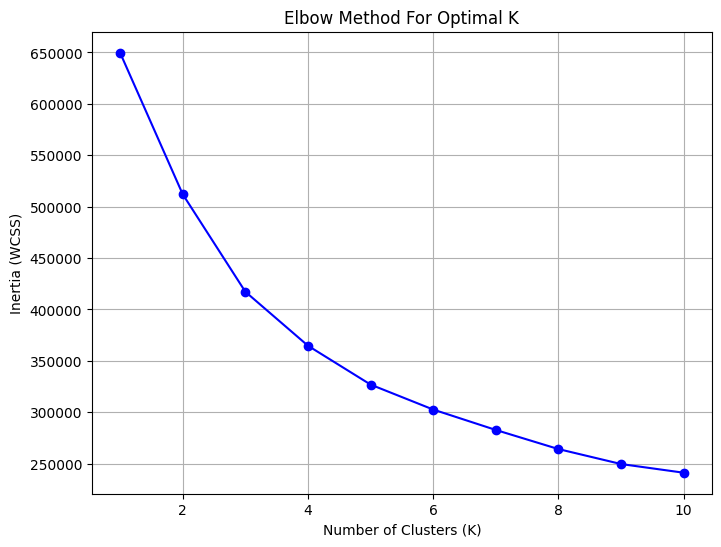

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

# Try K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_pca_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

### Explanation

Here if we see the elbow point is saying to take k=3 almost but since we already know that we have 2 classes so we'll take k=2 clusters 

## Cluster Purity Function

In [53]:
from sklearn.metrics import confusion_matrix

def cluster_purity(y_true, y_pred):
    """
    Calculate cluster purity given true labels and predicted clusters.
    """
    # Confusion matrix: Rows are true labels, Columns are predicted clusters
    contingency_matrix = confusion_matrix(y_true, y_pred)
    
    # Maximum count per cluster (dominant class for each cluster)
    max_counts = np.amax(contingency_matrix, axis=0)
    
    # Purity calculation
    purity = np.sum(max_counts) / np.sum(contingency_matrix)
    return purity


### Applying K Means

#### Without PCA

In [54]:
# Without PCA
kmeans_raw = KMeans(n_clusters=2, random_state=42)
kmeans_clusters_raw = kmeans_raw.fit_predict(non_pca_features)


#### Cluster Priority for Non PCA

In [55]:
kmeans_purity_raw = cluster_purity(data_ul_scaled["CropType_rice"], kmeans_clusters_raw)

print(f"Cluster Purity without PCA: {kmeans_purity_raw:.4f}")

Cluster Purity without PCA: 0.6989


#### With PCA

In [56]:
# With PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_clusters_pca = kmeans_pca.fit_predict(pca_features)



#### Cluster Purity for PCA

In [58]:
kmeans_purity_pca= cluster_purity(data_ul_scaled["CropType_rice"], kmeans_clusters_pca)

print(f"Cluster Purity without PCA: {kmeans_purity_pca:.4f}")

Cluster Purity without PCA: 0.6896


#### Visulization of Featutures

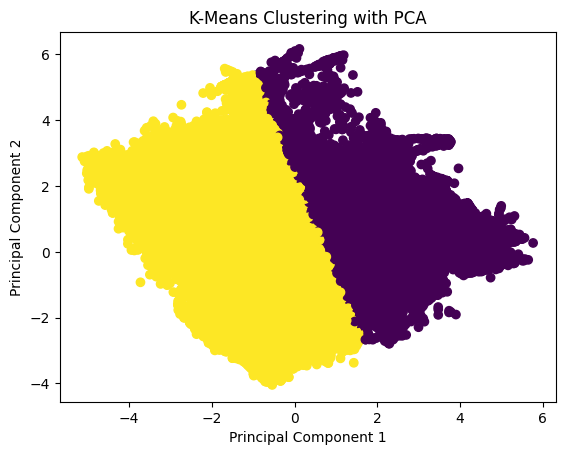

In [59]:
# Visualization for PCA-transformed data
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_clusters_pca, cmap='viridis')
plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Explanation

As we can see above we have 2 clusters formed here 

## Hierarchical Clustering



**Hierarchical Clustering** is an unsupervised machine learning algorithm used to build a hierarchy of clusters. Unlike K-Means, which requires the number of clusters to be specified beforehand, hierarchical clustering builds a tree-like structure called a **dendrogram**, which visually represents the nested grouping of data points at variou()


#### Without PCA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering without PCA
hierarchical_raw = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters_raw = hierarchical_raw.fit_predict(non_pca_features)


#### Cluster Purity for PCA

In [230]:
# Calculate purity
hierarchical_purity_raw = cluster_purity(data_ul_scaled["CropType_rice"], hierarchical_clusters_raw)
print(f"Cluster Purity without PCA (Hierarchical): {hierarchical_purity_raw:.4f}")


Cluster Purity without PCA (Hierarchical): 0.5801


#### With PCA

In [228]:
hierarchical_pca = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters_pca = hierarchical_pca.fit_predict(pca_features)

#### Cluster Purity

In [231]:
# Calculate purity
hierarchical_purity_raw = cluster_purity(data_ul_scaled["CropType_rice"], hierarchical_clusters_pca)
print(f"Cluster Purity with= PCA (Hierarchical): {hierarchical_purity_raw:.4f}")


Cluster Purity with= PCA (Hierarchical): 0.5458


#### Dendrogram for visualization (without PCA)

In [ ]:

plt.figure(figsize=(10, 7))
linkage_matrix_raw = linkage(non_pca_features, method='ward')
dendrogram(linkage_matrix_raw)
plt.title("Hierarchical Clustering Dendrogram (Without PCA)")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()



####  Visualization for PCA-transformed data

In [ ]:
# Visualization for PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=hierarchical_clusters_pca, cmap='viridis')
plt.title("Hierarchical Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** is a density-based clustering algorithm that groups together points that are close to each other based on distance and density, while marking points in low-density regions as outliers. Unlike K-Means, DBSCAN does not require specifying the number of clusters in advance. It is particularly useful for identifying clusters of arbitrary shape and handling noise or outliersr points are ass


#### Without PCA 

In [70]:
from sklearn.cluster import DBSCAN

# DBSCAN without PCA
dbscan_raw = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters_raw = dbscan_raw.fit_predict(non_pca_features)



#### Cluster Purity

In [71]:
dbscan_purity_raw = cluster_purity(data_ul_scaled["CropType_rice"], dbscan_clusters_raw)


print(f"Cluster Purity without PCA (DBSCAN): {dbscan_purity_raw:.4f}")


Cluster Purity without PCA (DBSCAN): 0.8797


#### With PCA

In [72]:
# DBSCAN with PCA
dbscan_raw = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters_pca= dbscan_raw.fit_predict(pca_features)


#### Cluster Purity

In [73]:
dbscan_purity_pca = cluster_purity(data_ul_scaled["CropType_rice"], dbscan_clusters_pca)


print(f"Cluster Purity with PCA (DBSCAN): {dbscan_purity_pca:.4f}")


Cluster Purity with PCA (DBSCAN): 0.5000


#### Visualization


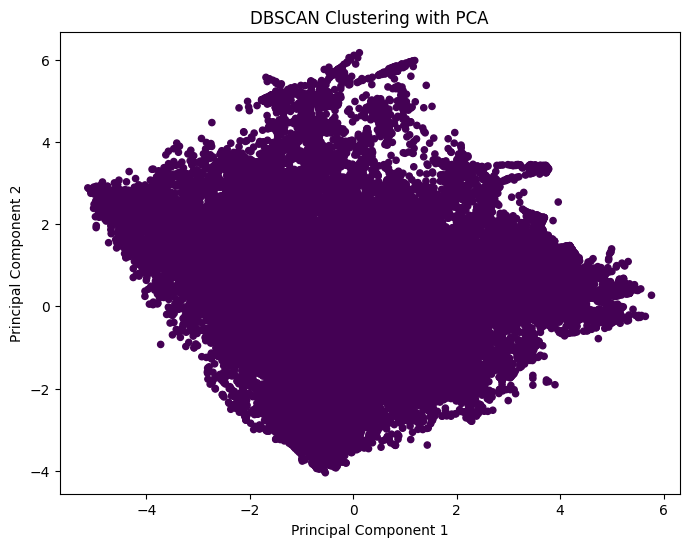

In [74]:
# Visualization: DBSCAN Clustering Results with PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_clusters_pca, cmap='viridis', s=20)
plt.title("DBSCAN Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Gaussian Mixture Models (GMM)

**Gaussian Mixture Models (GMM)** are a probabilistic unsupervised learning algorithm used for clustering. GMM assumes that the data is generated from a mixture of several Gaussian (normal) distributions with unknown parameters. It is more flexible than K-Means because it can model clusters of different shapes, sizes, and orientations.: Probability of data


#### Without PCA


In [79]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model without PCA
gmm_raw = GaussianMixture(n_components=2, random_state=42)
gmm_clusters_raw = gmm_raw.fit_predict(non_pca_features)

#### Cluster Purity


In [80]:
gmm_purity_raw = cluster_purity(data_ul_scaled["CropType_rice"], gmm_clusters_raw)

print(f"Cluster Purity without PCA (GMM): {gmm_purity_raw:.4f}")

Cluster Purity without PCA (GMM): 0.5826


#### With PCA


In [81]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model without PCA
gmm_raw = GaussianMixture(n_components=2, random_state=42)
gmm_clusters_pca = gmm_raw.fit_predict(pca_features)

#### Cluster Purity


In [82]:
gmm_purity_pca = cluster_purity(data_ul_scaled["CropType_rice"], gmm_clusters_pca)

print(f"Cluster Purity without PCA (GMM): {gmm_purity_pca:.4f}")

Cluster Purity without PCA (GMM): 0.6567


#### Visualization


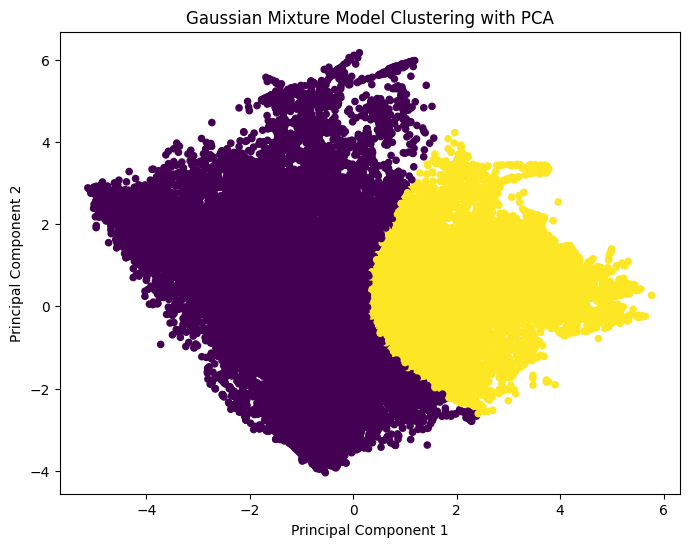

In [83]:
# Visualization: GMM Results with PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=gmm_clusters_pca, cmap='viridis', s=20)
plt.title("Gaussian Mixture Model Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()